# Titanic Machine Learning from Disaster

## 1/ Load Data

In [1]:
# import Lib
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Notes:
* `SibSp`: # of siblings / spouses aboard the Titanic
* `Parch`: # of parents / children aboard the Titanic

* `Ticket`: Ticket number
* `Cabin`: Cabin number

In [5]:
#preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###### PassengerId
The first column is the passenger ID. The ID for a passenger is just a number to identify this passenger in this dataset. So this column is not really a part of the information we should care about.
We can drop this column or make it the index for this dataset. Let's make it the index for the dataset just to demonstrate the use of df.set_index method.

In [6]:
train_df = pd.read_csv('train.csv', index_col="PassengerId")
test_df = pd.read_csv('test.csv', index_col="PassengerId")

In [7]:
# train_df.set_index(train_df.PassengerId, inplace=True)

In [8]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# train_df.drop('PassengerId', axis = 1, inplace=True)

In [10]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [11]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.1. Feature Classification: Categorical vs Numerical

* This helps us select the appropriate plots for visualization.

#### Which features are categorical? 

* Categorical Features: `nominal`, `ordinal`, `ratio`, `interval`
* To classify the samples into sets of similar samples

#### Which features are numerical?
* Numerical features: `discrete`, `continuous`, or `timeseries`
* These values change from sample to sample

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


  - Categorical: `Survived`, `Sex`, `Embarked`, `Pclass` (ordinal),  `SibSp` , `Parch`
      - `Embarked`: Port of Embarkation -	C = Cherbourg, Q = Queenstown, S = Southampton
  - Numerical: (continuous) `Age`, `Fare`, (discrete)
  
  - Mix types of data: `Ticket`, `Cabin`
  - Contain Error/Typo: `Name`
  - Blank or Null: `Cabin` > `Age` > `Embarked`
  - Various Data Type: String, Int, Float
  
According to the data dictionary, we know that if a passernger is marked as 1, he or she survived. Clearly the number 1 or 0 is a flag for the person's survivorship. Yet the data type of the column is int64, which is a numerical type. We can change that with the following command.

In [14]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [15]:
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [17]:
# features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
# def convert_cat(df, features):
#     for feature in features:
#         df[feature] = df[feature].astype("category") #df.Pclass, df."Pclass" => df["Pclass"]
# convert_cat(train_df, features)
# convert_cat(test_df, features) 

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


### 1.1.1. Distribution of Numerical feature values across the samples

In [19]:
train_df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


### 1.1.2. Distribution of Categorical features

In [20]:
train_df.describe(include=['category'])

,Survived
count,891
unique,2
top,0
freq,549


# 3. Exploratory Data Analysis (EDA)<a class="anchor" id="eda"></a>

## 3.1. Correlating categorical features
- Categorical: `Survived`, `Sex`, `Embarked`, `Pclass` (ordinal),  `SibSp` , `Parch`

### Target Variable: `Survived`

In [21]:
train_df["Survived"].value_counts().to_frame()

,Survived
0,549
1,342


In [22]:
train_df["Survived"].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


Only 38% survived the disaster. So the training data suffers from data imbalance but it is not severe which is why I will not consider techniques like sampling to tackle the imbalance.

### `Sex`

In [23]:
train_df['Sex'].value_counts().to_frame()

,Sex
male,577
female,314


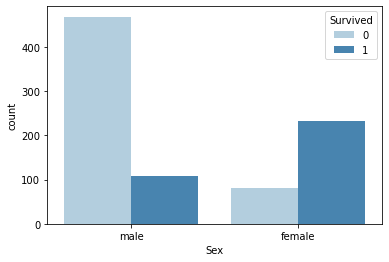

In [24]:
sns.countplot(data=train_df, x='Sex', hue='Survived', palette='Blues');

- Remaining Categorical Feature Columns

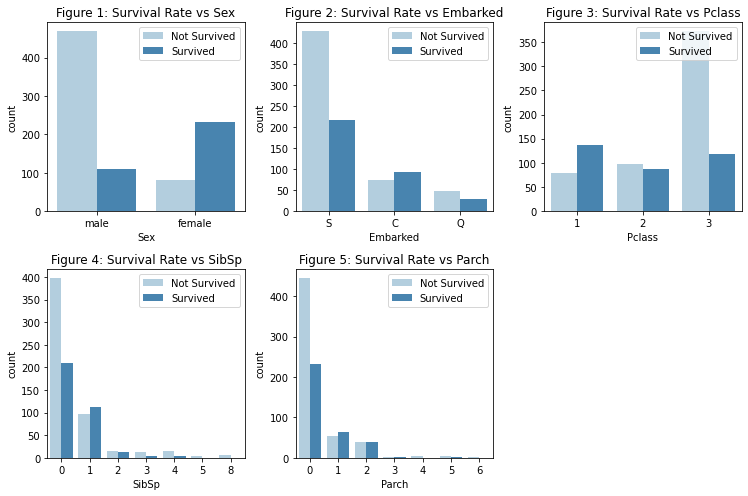

In [25]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c #index to loop through list "cols"
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df, x=cols[i], hue="Survived", palette="Blues", ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])
ax.flat[-1].set_visible(False) #Remove the last subplot
plt.tight_layout()
plt.show()

### Observation:

* **Survival Rate**: 
    - Fig 1: Female survival rate > male
    - Fig 2: Most People embarked on Southampton, and also had the highest people not survived
    - Fig 3: 1st class higher survival rate  
    - Fig 4: People going with 0 `SibSp` are mostly not survived. the number of passenger with 1-2 family members has a better chance of survival
    - Fig 5: People going with 0 `Parch` are mostly not survived 
    
## 3.2. EDA for Numerical Features
- Numerical Features: (continuous) `Age`, `Fare`

### Age

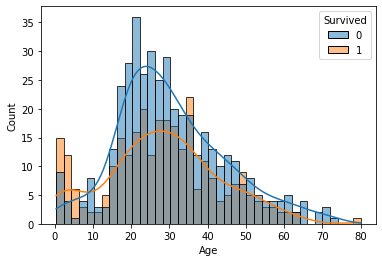

In [26]:
sns.histplot(data=train_df, x='Age', hue='Survived' ,bins = 40, kde=True);

- Majority passengers were from 18-40 ages
- Chilren had more chance to survive than other ages

### Fare

In [27]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

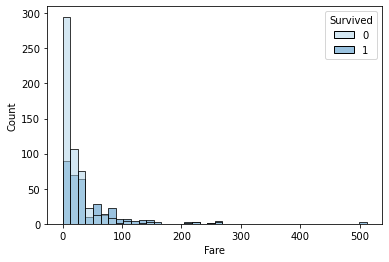

In [28]:
sns.histplot(data=train_df, x='Fare', hue='Survived', bins = 40, palette='Blues');

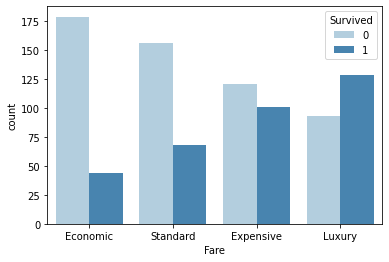

In [29]:
#To name for 0-25% quartile, 25-50, 50-75, 75-100

fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels=fare_categories)

sns.countplot(x=quartile_data, hue=train_df['Survived'], palette='Blues');

In [30]:
train_df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

- Distribution of Fare
    - Fare does not follow a normal distribution and has a huge spike at the price range `[0–100$]`.
    - The distribution is skewed to the left with `75%` of the fare paid under `$31` and a max paid fare of `$512`. 
- Quartile plot:
    - Passenger with Luxury & Expensive Fare will have more chance to survive

# 4.  Feature Engineering & Data Wrangling <a class="anchor" id="fe-dw"></a>
## 4.1. Feature Engineering
### Name

- Regular Expression

In [31]:
train_df['Name'].head(10)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [32]:
import re #regular expression

def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

train_df['Title']=train_df['Name'].apply(lambda name: extract_title(name))

In [33]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [34]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [35]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [36]:
def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"

train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

sns.countplot(data=train_df, x='Title', hue='Survived');

### Family
- `SibSp`, `Parch`

In [37]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

In [38]:
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [39]:
train_df['Family_Cat']=pd.cut(train_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium','Large']) # (0,1], (1,4], (4,6], (6,20]
test_df['Family_Cat']=pd.cut(test_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium','Large']) # (0,1], (1,4], (4,6], (6,20]

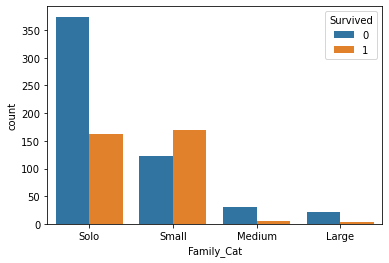

In [40]:
sns.countplot(data=train_df, x='Family_Cat', hue='Survived');

##  4.2. Data Wrangling


In [41]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [42]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"{col} has {missing_count*100/n_rows:.2f}% missing values.")
            
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Age has 19.87% missing values.
Embarked has 0.22% missing values.
Age has 20.57% missing values.
Fare has 0.24% missing values.


### Filling missing values

#### X_train :
- Filling missing values with Mode
#### X_test :
- Filling missing values with median

In [43]:
train_df = train_df[['Age', 'Fare','Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat','Survived']]

In [44]:
test_df = test_df[['Age', 'Fare','Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']]
test_df

,Age,Fare,Sex,Pclass,Embarked,Title,Family_Cat
PassengerId,,,,,,,
892,34.5,7.8292,male,3,Q,Mr,Solo
893,47.0,7.0000,female,3,S,Mrs,Small
894,62.0,9.6875,male,2,Q,Mr,Solo
895,27.0,8.6625,male,3,S,Mr,Solo
896,22.0,12.2875,female,3,S,Mrs,Small
...,...,...,...,...,...,...,...
1305,NaN,8.0500,male,3,S,Mr,Solo
1306,39.0,108.9000,female,1,C,Others,Solo
1307,38.5,7.2500,male,3,S,Mr,Solo


In [45]:
train_df['Embarked']=train_df['Embarked'].astype("str")
test_df['Fare']=test_df['Fare'].astype('float')

In [46]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)

In [47]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Age has 19.87% missing values.
Age has 20.57% missing values.


In [48]:
train_df.describe()

,Age,Fare,Pclass
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642
std,14.526497,49.693429,0.836071
min,0.420000,0.000000,1.000000
25%,20.125000,7.910400,2.000000
50%,28.000000,14.454200,3.000000
75%,38.000000,31.000000,3.000000
max,80.000000,512.329200,3.000000


In [49]:
mean=np.mean(train_df['Fare'])
st=np.std(train_df['Fare'])
train_df1=train_df[((train_df['Fare']>=0) & (train_df['Fare']<=(mean+2*st)))]
train_df1

,Age,Fare,Sex,Pclass,Embarked,Title,Family_Cat,Survived
PassengerId,,,,,,,,
1,22.0,7.2500,male,3,S,Mr,Small,0
2,38.0,71.2833,female,1,C,Mrs,Small,1
3,26.0,7.9250,female,3,S,Miss,Solo,1
4,35.0,53.1000,female,1,S,Mrs,Small,1
5,35.0,8.0500,male,3,S,Mr,Solo,0
...,...,...,...,...,...,...,...,...
887,27.0,13.0000,male,2,S,Others,Solo,0
888,19.0,30.0000,female,1,S,Miss,Solo,1
889,NaN,23.4500,female,3,S,Miss,Small,0


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

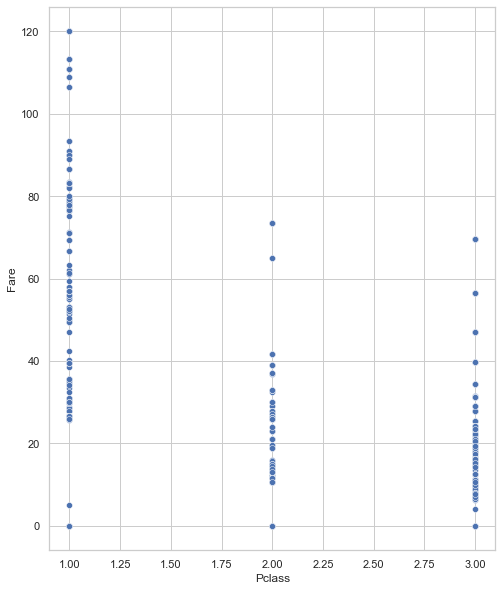

In [50]:
matplotlib.rcParams["figure.figsize"] = (8,10)
sns.set(style='whitegrid')
sns.scatterplot(x= train_df1['Pclass'], y = train_df1['Fare'],data=train_df)

In [51]:
def remove_bhk_outliers(df):
    df_out = pd.DataFrame()
    mean_list=[]
    bhk_stats={}
    for bhk, bhk_df in df.groupby('Pclass'):
        bhk_stats[bhk] = {
            'mean': np.mean(bhk_df.Fare),           
        }
        mean_list.append(bhk_stats[bhk].get('mean'))
    for bhk, bhk_df in df.groupby('Pclass'):
        if bhk <=2:
            bhk_df=bhk_df[ (bhk_df['Fare'] >= mean_list[bhk]) ]
            df_out = pd.concat([df_out,bhk_df],ignore_index=True)
        else:
            df_out = pd.concat([df_out,bhk_df],ignore_index=True)
    return df_out
train_df2 = remove_bhk_outliers(train_df1)
train_df2

,Age,Fare,Sex,Pclass,Embarked,Title,Family_Cat,Survived
0,38.0,71.2833,female,1,C,Mrs,Small,1
1,35.0,53.1000,female,1,S,Mrs,Small,1
2,54.0,51.8625,male,1,S,Mr,Solo,0
3,58.0,26.5500,female,1,S,Miss,Solo,1
4,28.0,35.5000,male,1,S,Mr,Solo,1
...,...,...,...,...,...,...,...,...
754,22.0,10.5167,female,3,S,Miss,Solo,0
755,25.0,7.0500,male,3,S,Mr,Solo,0
756,39.0,29.1250,female,3,Q,Mrs,Medium,0
757,NaN,23.4500,female,3,S,Miss,Small,0


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

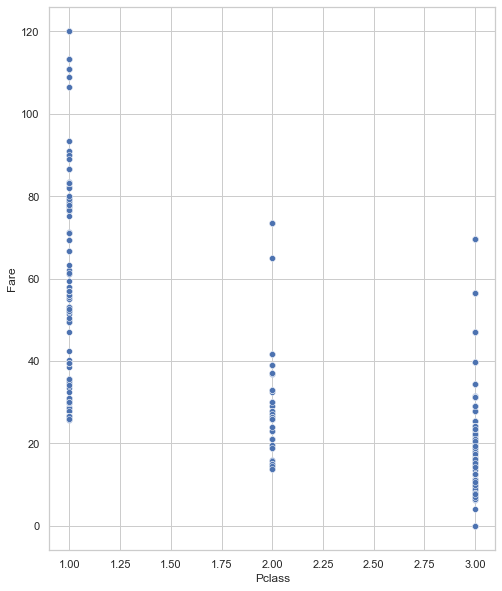

In [52]:
matplotlib.rcParams["figure.figsize"] = (8,10)
sns.set(style='whitegrid')
sns.scatterplot(x= train_df2['Pclass'], y = train_df2['Fare'],data=train_df)

In [53]:
train_df2

,Age,Fare,Sex,Pclass,Embarked,Title,Family_Cat,Survived
0,38.0,71.2833,female,1,C,Mrs,Small,1
1,35.0,53.1000,female,1,S,Mrs,Small,1
2,54.0,51.8625,male,1,S,Mr,Solo,0
3,58.0,26.5500,female,1,S,Miss,Solo,1
4,28.0,35.5000,male,1,S,Mr,Solo,1
...,...,...,...,...,...,...,...,...
754,22.0,10.5167,female,3,S,Miss,Solo,0
755,25.0,7.0500,male,3,S,Mr,Solo,0
756,39.0,29.1250,female,3,Q,Mrs,Medium,0
757,NaN,23.4500,female,3,S,Miss,Small,0


In [54]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train_df2['Family_Cat']= label_encoder.fit_transform(train_df2['Family_Cat'])
  
train_df2['Family_Cat'].unique()

array([2, 3, 1, 0])

In [55]:
train_df3 = pd.get_dummies(train_df2, columns = ['Sex', 'Embarked','Title'])
train_df3

,Age,Fare,Pclass,Family_Cat,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,38.0,71.2833,1,2,1,1,0,1,0,0,0,0,0,0,1,0
1,35.0,53.1000,1,2,1,1,0,0,0,1,0,0,0,0,1,0
2,54.0,51.8625,1,3,0,0,1,0,0,1,0,0,0,1,0,0
3,58.0,26.5500,1,3,1,1,0,0,0,1,0,0,1,0,0,0
4,28.0,35.5000,1,3,1,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,22.0,10.5167,3,3,0,1,0,0,0,1,0,0,1,0,0,0
755,25.0,7.0500,3,3,0,0,1,0,0,1,0,0,0,1,0,0
756,39.0,29.1250,3,1,0,1,0,0,1,0,0,0,0,0,1,0
757,NaN,23.4500,3,2,0,1,0,0,0,1,0,0,1,0,0,0


In [56]:
train_df2['Embarked']=train_df2['Embarked'].apply(lambda x: train_df2['Embarked'].mode()[0] if x =='nan' else x )
train_df2[train_df2['Embarked']=='nan']

,Age,Fare,Sex,Pclass,Embarked,Title,Family_Cat,Survived


In [57]:
train_df3 = pd.get_dummies(train_df2, columns = ['Sex', 'Embarked','Title'])
train_df3

,Age,Fare,Pclass,Family_Cat,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,38.0,71.2833,1,2,1,1,0,1,0,0,0,0,0,1,0
1,35.0,53.1000,1,2,1,1,0,0,0,1,0,0,0,1,0
2,54.0,51.8625,1,3,0,0,1,0,0,1,0,0,1,0,0
3,58.0,26.5500,1,3,1,1,0,0,0,1,0,1,0,0,0
4,28.0,35.5000,1,3,1,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,22.0,10.5167,3,3,0,1,0,0,0,1,0,1,0,0,0
755,25.0,7.0500,3,3,0,0,1,0,0,1,0,0,1,0,0
756,39.0,29.1250,3,1,0,1,0,0,1,0,0,0,0,1,0
757,NaN,23.4500,3,2,0,1,0,0,0,1,0,1,0,0,0


In [58]:
train_df4 = train_df3.drop(['Sex_male','Embarked_S','Title_Others'],axis='columns')
train_df4

,Age,Fare,Pclass,Family_Cat,Survived,Sex_female,Embarked_C,Embarked_Q,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,38.0,71.2833,1,2,1,1,1,0,0,0,0,1
1,35.0,53.1000,1,2,1,1,0,0,0,0,0,1
2,54.0,51.8625,1,3,0,0,0,0,0,0,1,0
3,58.0,26.5500,1,3,1,1,0,0,0,1,0,0
4,28.0,35.5000,1,3,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
754,22.0,10.5167,3,3,0,1,0,0,0,1,0,0
755,25.0,7.0500,3,3,0,0,0,0,0,0,1,0
756,39.0,29.1250,3,1,0,1,0,1,0,0,0,1
757,NaN,23.4500,3,2,0,1,0,0,0,1,0,0


In [59]:
train_df4['Age']=train_df4['Age'].fillna(train_df4.Age.mean())
train_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Age           759 non-null    float64 
 1   Fare          759 non-null    float64 
 2   Pclass        759 non-null    int64   
 3   Family_Cat    759 non-null    int32   
 4   Survived      759 non-null    category
 5   Sex_female    759 non-null    uint8   
 6   Embarked_C    759 non-null    uint8   
 7   Embarked_Q    759 non-null    uint8   
 8   Title_Master  759 non-null    uint8   
 9   Title_Miss    759 non-null    uint8   
 10  Title_Mr      759 non-null    uint8   
 11  Title_Mrs     759 non-null    uint8   
dtypes: category(1), float64(2), int32(1), int64(1), uint8(7)
memory usage: 26.9 KB


In [60]:
X_train =train_df4.drop(['Survived'],axis='columns')
y_train = train_df4['Survived']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.2)

In [62]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:00<00:00, 34.96it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.85,0.84,0.84,0.85,0.09
BaggingClassifier,0.82,0.82,0.82,0.82,0.02
AdaBoostClassifier,0.81,0.81,0.81,0.81,0.06
LGBMClassifier,0.82,0.81,0.81,0.82,0.09
ExtraTreesClassifier,0.82,0.81,0.81,0.82,0.09
Perceptron,0.80,0.81,0.81,0.80,0.01
RidgeClassifierCV,0.81,0.81,0.81,0.81,0.01
NearestCentroid,0.80,0.81,0.81,0.80,0.01
GaussianNB,0.80,0.81,0.81,0.80,0.01


In [64]:
train_df5 =  train_df3.drop(['Sex_male','Embarked_S','Title_Others'],axis='columns')
train_df5

,Age,Fare,Pclass,Family_Cat,Survived,Sex_female,Embarked_C,Embarked_Q,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,38.00,71.28,1,2,1,1,1,0,0,0,0,1
1,35.00,53.10,1,2,1,1,0,0,0,0,0,1
2,54.00,51.86,1,3,0,0,0,0,0,0,1,0
3,58.00,26.55,1,3,1,1,0,0,0,1,0,0
4,28.00,35.50,1,3,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
754,22.00,10.52,3,3,0,1,0,0,0,1,0,0
755,25.00,7.05,3,3,0,0,0,0,0,0,1,0
756,39.00,29.12,3,1,0,1,0,1,0,0,0,1
757,NaN,23.45,3,2,0,1,0,0,0,1,0,0


In [77]:
train_df6 = train_df5.dropna()
X_train_Age = train_df6.drop(['Age'],axis='columns')
y_train_Age = train_df6['Age']
traindf7 = train_df5[train_df5['Age'].isnull()]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_train_Age,y_train_Age,test_size=0.2)

In [79]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 42/42 [00:02<00:00, 19.93it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.44,0.49,11.14,0.04
MLPRegressor,0.42,0.47,11.34,0.26
PoissonRegressor,0.42,0.47,11.35,0.01
SGDRegressor,0.41,0.47,11.39,0.01
LarsCV,0.41,0.47,11.40,0.02
BayesianRidge,0.41,0.46,11.42,0.01
ElasticNetCV,0.41,0.46,11.43,0.04
OrthogonalMatchingPursuitCV,0.41,0.46,11.44,0.01
LassoLarsCV,0.41,0.46,11.45,0.01
